## **xG Cumulative (Flow)**

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from highlight_text import fig_text

In [2]:
# read data
df = pd.read_csv('../data/serieA-mil_udi.csv')
df

,Unnamed: 0,team_id,player_id,player_name,min,expected_goals,event_type,team_color,match_id,team_name,venue
0,0,8600,844504,Rodrigo Becao,2,0.086003,Goal,#907850,3919071,Udinese,A
1,1,8564,750027,Brahim Diaz,7,0.054140,AttemptSaved,#302028,3919071,AC Milan,H
2,2,8564,724371,Theo Hernandez,11,0.788400,Goal,#302028,3919071,AC Milan,H
3,3,8564,265725,Ante Rebic,15,0.075055,Goal,#302028,3919071,AC Milan,H
4,4,8564,848844,Rafael Leao,18,0.033549,Miss,#302028,3919071,AC Milan,H
5,5,8600,534484,Isaac Success,20,0.030647,Miss,#907850,3919071,Udinese,A
6,6,8600,251925,Gerard Deulofeu,28,0.140806,AttemptSaved,#907850,3919071,Udinese,A
7,7,8564,609624,Ismael Bennacer,30,0.032695,Miss,#302028,3919071,AC Milan,H
8,8,8600,500502,Adam Masina,45,0.034982,Goal,#907850,3919071,Udinese,A
9,9,8564,750027,Brahim Diaz,46,0.764904,Goal,#302028,3919071,AC Milan,H


In [3]:
df['min'] = df['min'].astype(int)

In [4]:
# create lists (4 - home and away xg and minutes) to plot the different xG values
# start at zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]

home_team = 'AC Milan'
away_team = 'Udinese'

for x in range(len(df['expected_goals'])):
    if df['team_name'][x] == home_team:
        h_xG.append(df['expected_goals'][x])
        h_min.append(df['min'][x])
    if df['team_name'][x] == away_team:
        a_xG.append(df['expected_goals'][x])
        a_min.append(df['min'][x])
        
# xG values cumulative rather than single shot values
def num_cumulative_sum(num_list):
    return [sum(num_list[:i+1]) for i in range(len(num_list))]

h_cumulative = num_cumulative_sum(h_xG)
a_cumulative = num_cumulative_sum(a_xG)

# find the total xG
hlast = round(h_cumulative[-1], 2)
alast = round(a_cumulative[-1], 2)

In [5]:
from PIL import Image
import urllib

(-0.5, 191.5, 191.5, -0.5)

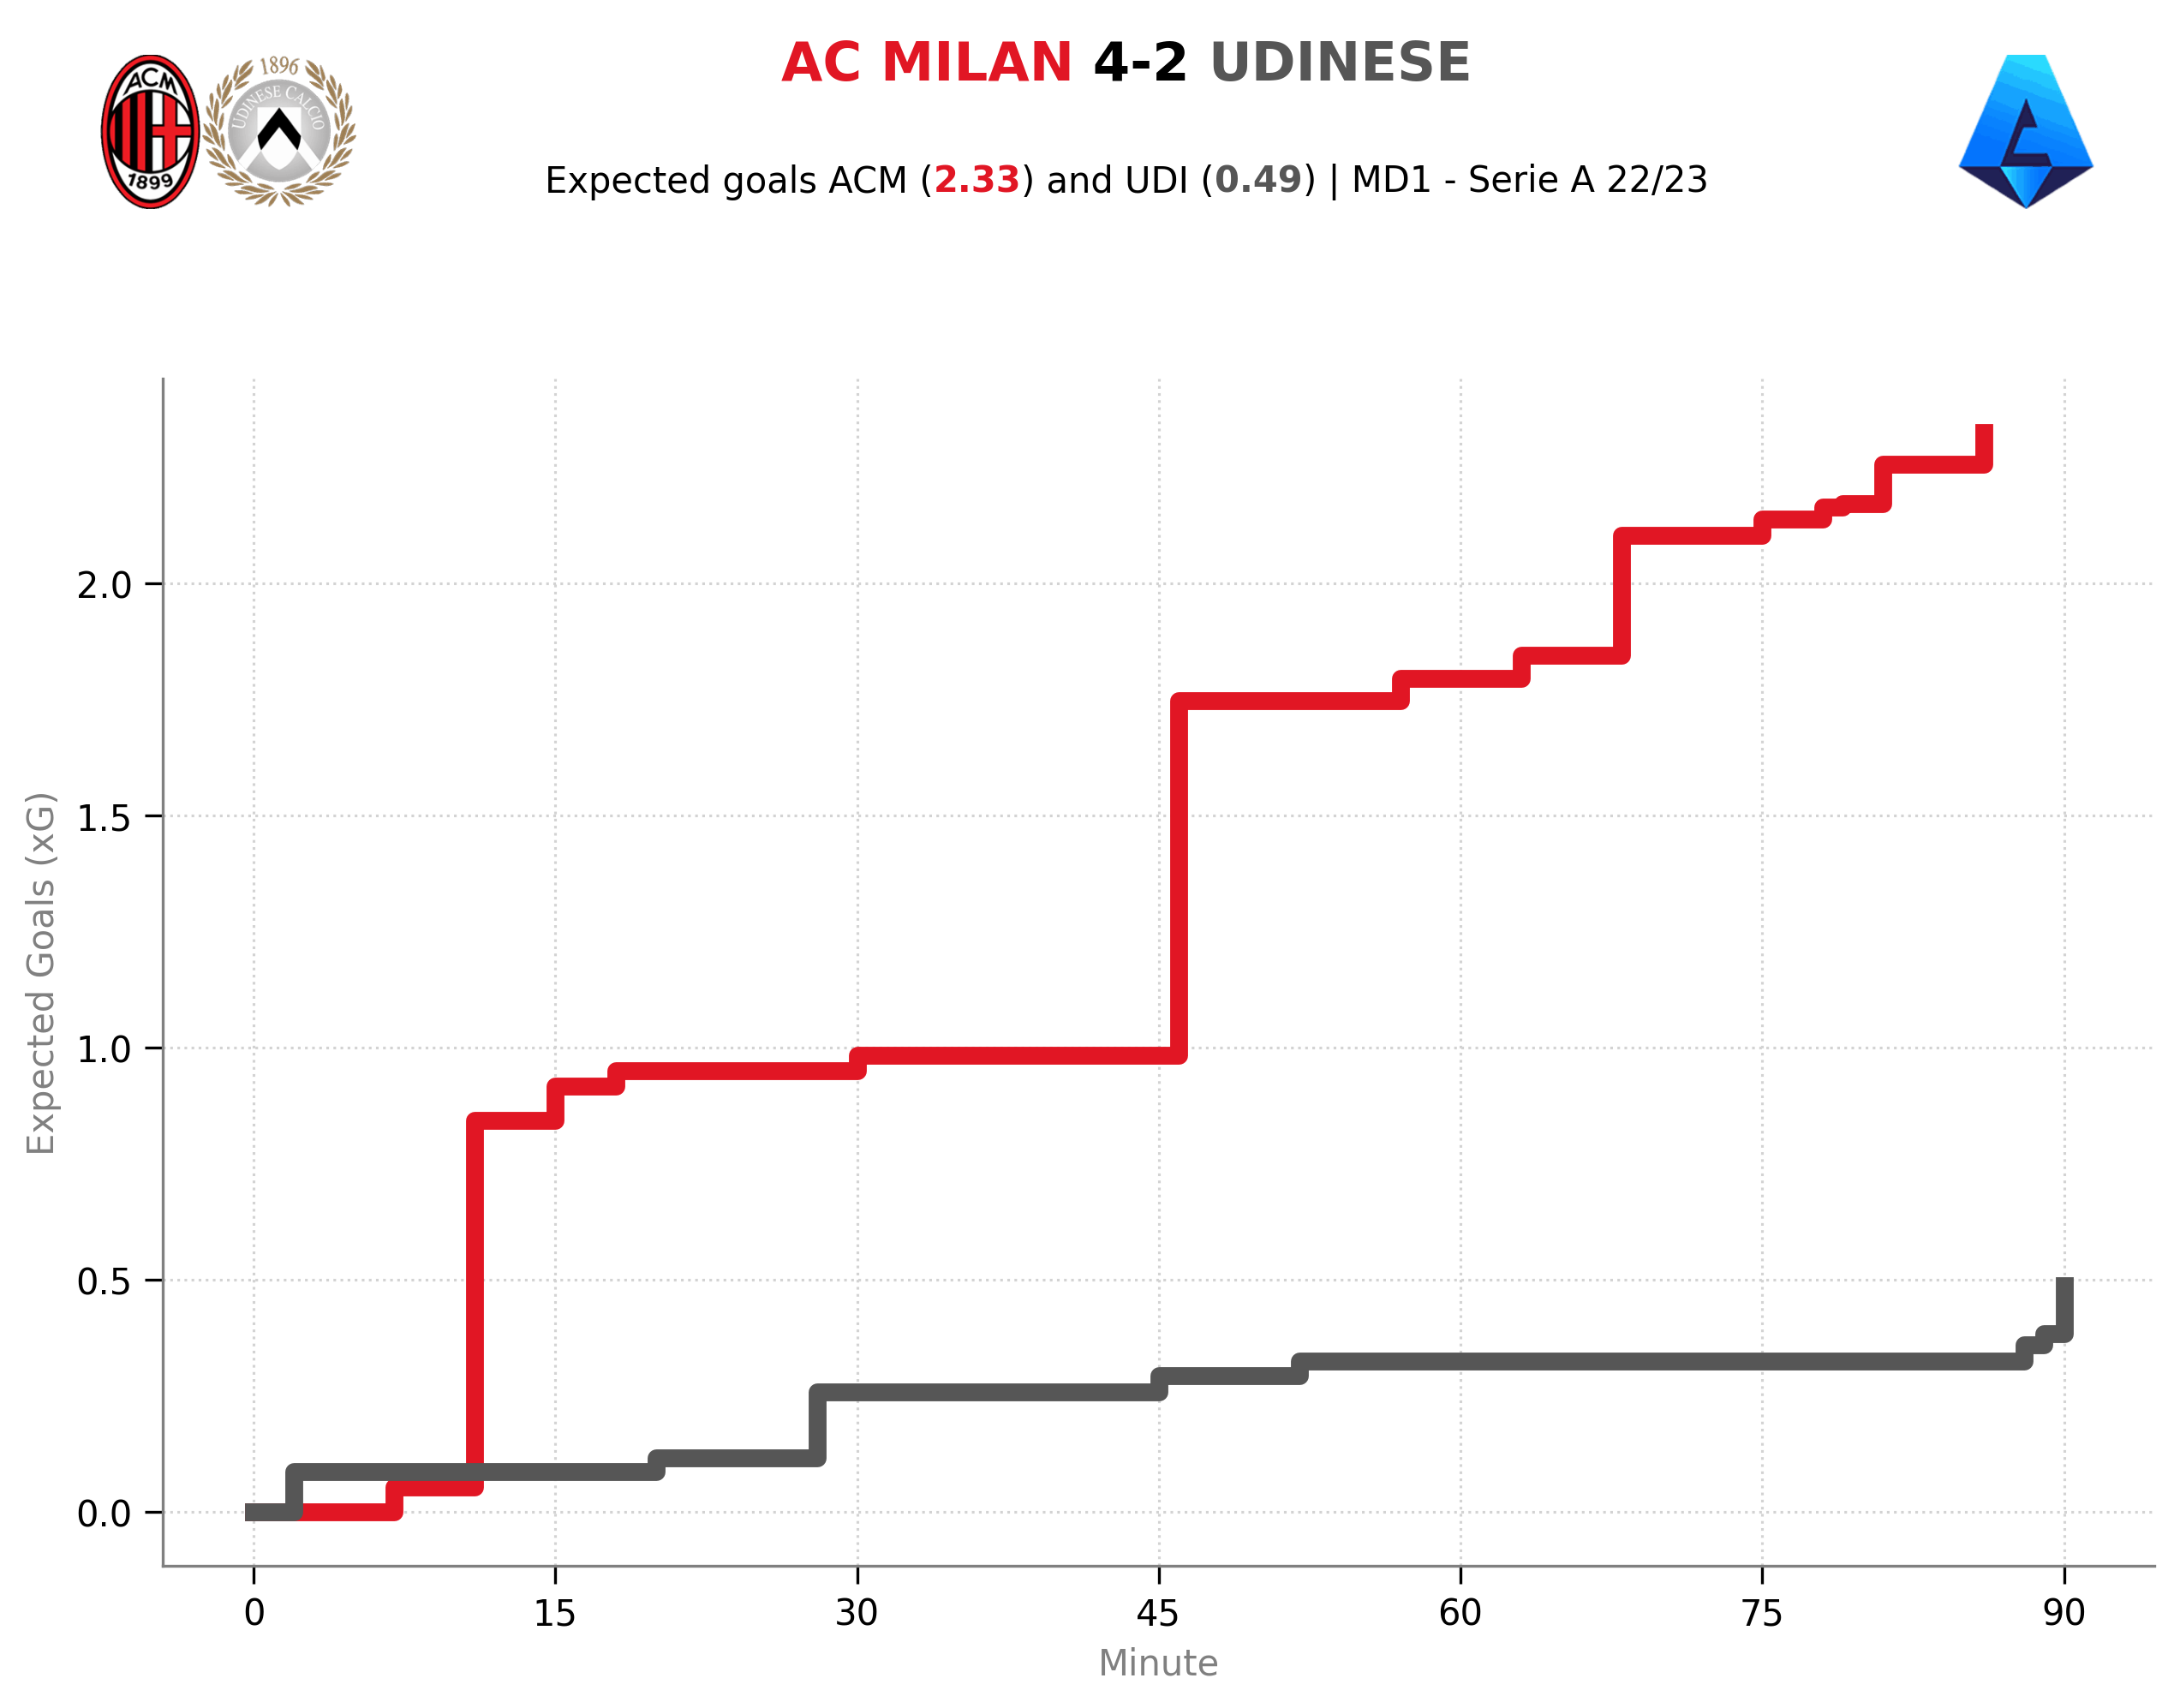

In [6]:
fig = plt.figure(figsize=(10,6), dpi=300, facecolor='white')
ax = plt.subplot(111, facecolor='white')

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

# remove top and right spines and change the color
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color("grey")

# plot the step graphs
line_1 = ax.step(x=h_min, y=h_cumulative, color='#e11624', label=home_team, linewidth=5, where='post')
line_2 = ax.step(x=a_min, y=a_cumulative, color='#565656', label=away_team, linewidth=5, where='post')

# customize the ticks to match spinecolor and adjust label size
ax.tick_params(
    color = "black",
    length = 5,
    which = "major",
    labelsize = 10,
    labelcolor = "black",
    zorder = 3
)

# plt.xticks([0,15,30,45,60,75,90])
# set x-axis major tick positions
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
# set y-axis major tick positions to only 0.5xG multiples
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.xlabel('Minute', color='grey', fontsize=10)
plt.ylabel('Expected Goals (xG)', color='grey', fontsize=10)

# title and subtitle for the legend
fig_text(
    x=0.5, y=1.1,
    s="<AC MILAN> 4-2 <UDINESE>",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color="black",
    weight="bold",
    size=15,
    ha='center',  # centering the text horizontally
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=0.5, y=1.02,
    s="Expected goals ACM (<2.33>) and UDI (<0.49>) | MD1 - Serie A 22/23",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color="black",
    size=10,
    ha='center',  # centering the text horizontally
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

# logo home team
logo_ax = fig.add_axes([0.07, .99, 0.1, 0.1], zorder=1)
club_icon_h = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon_h)
logo_ax.axis("off")

# logo away team
logo_ax = fig.add_axes([0.12, .99, 0.1, 0.1], zorder=1)
club_icon_a = Image.open(urllib.request.urlopen(f"{fotmob_url}8600.png"))
logo_ax.imshow(club_icon_a)
logo_ax.axis("off")

fotmob_url_league = "https://images.fotmob.com/image_resources/logo/leaguelogo/"

# league logo
logo_ax = fig.add_axes([0.8, .99, 0.1, 0.1], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_league}55.png"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

In [7]:
# save figure
fig.savefig('../figures/140822_MilUdi-xG-cumulative.png', bbox_inches='tight')